In [0]:
pip install mysql-connector-python

     |████████████████████████████████| 13.0MB 5.1MB/s 


In [0]:
import mysql.connector
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics 
import numpy as np

In [0]:
conn = mysql.connector.connect(
         user='foouser',
         password='F88Pa%%**',
         host='134.209.144.239',
         database='stocksdb')
print(conn)

In [0]:
sql_select_Query = "SHOW TABLES"
cursor = conn.cursor()
cursor.execute(sql_select_Query)

In [0]:
records = cursor.fetchall()
records

In [10]:
sql_select_Query = "SELECT * FROM interview"
cursor = conn.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Total number of rows in the interview table is - ", cursor.rowcount)

Total number of rows in python_developers is -  500000


In [0]:
results =  cursor.execute(sql_select_Query)
df = DataFrame(cursor.fetchall())
df.columns = results.keys()
df.head()

In [17]:
df = pd.read_sql(sql_select_Query, conn)
df.head()

,isin,insertion_datetime,datetime,open,high,low,close,volume,open_interest
0,INE545A01016,NaT,2018-01-01 09:15:00,2419.0,2436.00,2408.90,2435.25,10281,NaN
1,INE545A01016,NaT,2018-01-01 09:16:00,2435.0,2440.00,2426.45,2439.00,13315,NaN
2,INE545A01016,NaT,2018-01-01 09:17:00,2439.7,2439.70,2422.10,2424.95,3760,NaN
3,INE545A01016,NaT,2018-01-01 09:18:00,2420.0,2424.50,2386.50,2395.00,11653,NaN
4,INE545A01016,NaT,2018-01-01 09:19:00,2395.0,2413.95,2394.70,2409.85,7744,NaN


In [21]:
df.describe()

,open,high,low,close,volume,open_interest
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,48060.00000
mean,1483.673727,1484.529598,1482.876855,1483.721753,407.884840,648.20102
std,1231.689627,1232.654749,1230.771130,1231.747869,2228.894209,1494.05814
min,9.000000,9.000000,9.000000,9.000000,0.000000,0.00000
25%,587.750000,587.950000,587.500000,587.750000,0.000000,91.00000
50%,891.600000,892.100000,891.000000,891.525000,0.000000,239.50000
75%,2365.000000,2365.012500,2365.000000,2365.000000,107.000000,616.00000
max,4927.950000,4953.900000,4855.400000,4928.000000,365036.000000,47171.00000


In [23]:
dff = df[["open","high","low","close","volume"]]
dff.corr()

,open,high,low,close,volume
open,1.000000,0.999997,0.999998,0.999996,0.090143
high,0.999997,1.000000,0.999995,0.999998,0.090793
low,0.999998,0.999995,1.000000,0.999998,0.089672
close,0.999996,0.999998,0.999998,1.000000,0.090307
volume,0.090143,0.090793,0.089672,0.090307,1.000000


In [26]:
dff = df[["open","high","low","close","volume","open_interest"]]
dff.dropna()
dff.corr()

,open,high,low,close,volume,open_interest
open,1.000000,0.999997,0.999998,0.999996,0.090143,0.085696
high,0.999997,1.000000,0.999995,0.999998,0.090793,0.093350
low,0.999998,0.999995,1.000000,0.999998,0.089672,0.079856
close,0.999996,0.999998,0.999998,1.000000,0.090307,0.087347
volume,0.090143,0.090793,0.089672,0.090307,1.000000,1.000000
open_interest,0.085696,0.093350,0.079856,0.087347,1.000000,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


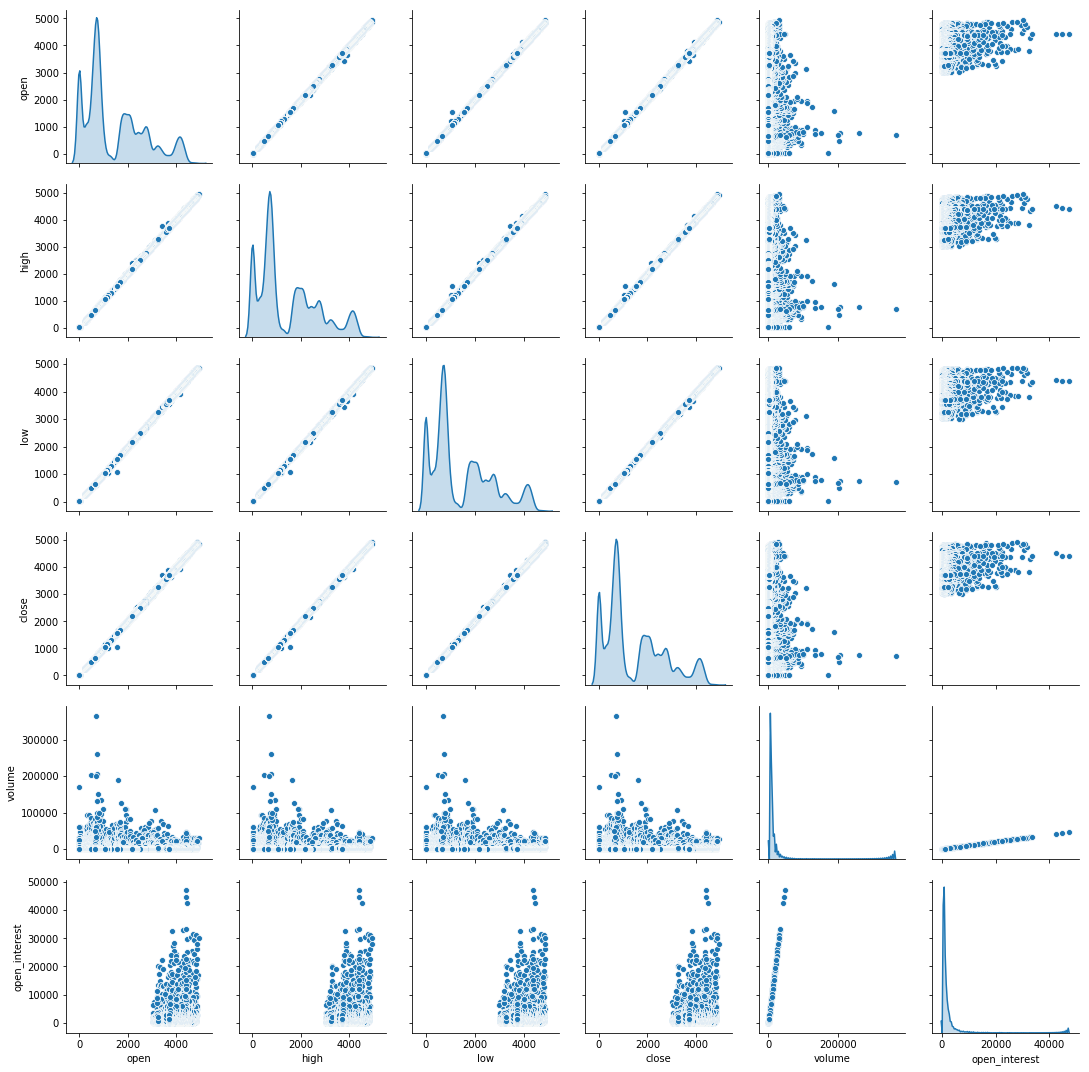

In [30]:
sns.pairplot(dff, diag_kind = 'kde')

###Linear Regression

In [35]:
y = dff['close'].values.reshape(-1,1)
X = dff['open'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

#Model creation and training
lm = LinearRegression()
lm.fit(X_train,y_train) # Training the regression algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

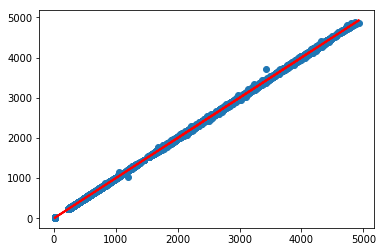

In [38]:
#Prediction using our model
y_pred = lm.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

###Performance evaluation

In [40]:
lm.score(X_test,y_test)

0.9999927929674315

In [41]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(10)

,Actual,Predicted
0,4134.90,4133.235014
1,2860.25,2863.121309
2,794.50,792.017429
3,269.45,268.991195
4,1865.00,1865.071250
5,3989.95,3990.127837
6,10.00,9.978204
7,823.35,823.369001
8,800.00,800.017830
9,2723.90,2705.613409


In [46]:
print('Mean of the  closing stock :', y.mean())  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean of the  closing stock : 1483.7217530000003
Mean Absolute Error: 1.059080402163002
Mean Squared Error: 10.936168008063396
Root Mean Squared Error: 3.3069877544471487


#####The root mean squared error is far below 1% of the mean of the closing stock so we can conclude we have achieved a model that can make good predictions
